# Cluster Analysis: GMM Day 7 (K=8)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
# plt.style.use('ggplot')
%matplotlib inline

from scipy import stats
get_ipython().magic(u'config IPCompleter.greedy=True')



## 1. Get Day 7 GMM Clusters

In [2]:
# Import the clusters 
df_c0 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_00_k8.tsv", sep="\t")
df_c1 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_01_k8.tsv", sep="\t")
df_c2 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_02_k8.tsv", sep="\t")
df_c3 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_03_k8.tsv", sep="\t")
df_c4 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_04_k8.tsv", sep="\t")
df_c5 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_05_k8.tsv", sep="\t")
df_c6 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_06_k8.tsv", sep="\t")
df_c7 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_clusters/gmm_day_7_cluster_07_k8.tsv", sep="\t")



In [3]:
# Removing 'NaN' with zero
df_c0.fillna(0, inplace=True)
df_c1.fillna(0, inplace=True)
df_c2.fillna(0, inplace=True)
df_c3.fillna(0, inplace=True)
df_c4.fillna(0, inplace=True)
df_c5.fillna(0, inplace=True)
df_c6.fillna(0, inplace=True)
df_c7.fillna(0, inplace=True)


In [4]:
# Accounts list (systemid) in each cluster
c0_systemid_list = list(df_c0['systemid'])
c1_systemid_list = list(df_c1['systemid'])
c2_systemid_list = list(df_c2['systemid'])
c3_systemid_list = list(df_c3['systemid'])
c4_systemid_list = list(df_c4['systemid'])
c5_systemid_list = list(df_c5['systemid'])
c6_systemid_list = list(df_c6['systemid'])
c7_systemid_list = list(df_c7['systemid'])


In [5]:
# Store and print cluster sizes 
cls_sizes = {'cluster_id': ['cluster 00', 
                            'cluster 01', 
                            'cluster 02', 
                            'cluster 03', 
                            'cluster 04', 
                            'cluster 05', 
                            'cluster_06',
                            'cluster_07'], 
             'size' : [df_c0.shape[0], 
                       df_c1.shape[0], 
                       df_c2.shape[0], 
                       df_c3.shape[0], 
                       df_c4.shape[0], 
                       df_c5.shape[0], 
                       df_c6.shape[0],
                       df_c7.shape[0]]
            }
df_cls_sizes = pd.DataFrame(cls_sizes, columns =['cluster_id', 'size'])

In [6]:
# checking
df_c0.head(2)

,Unnamed: 0,systemid,activateestimate,activateexpense,activateotherincome,activatepayment,activateproject,activaterecurringprofile,activatestaff,adminde-activation,...,is_paying,avg_wc_description_day_7,avg_wc_notes_day_7,avg_wc_terms_day_7,avg_wc_address_day_7,invoice_count_day_7,client_count_day_7,cluster_id_k6,cluster_id_k7,cluster_id_k8
0,1,3592463,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,2,0
1,5,3592471,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,2,0


In [7]:
df_features_names = pd.DataFrame(list(df_c0))

In [8]:
df_features_names.head()

,0
0,Unnamed: 0
1,systemid
2,activateestimate
3,activateexpense
4,activateotherincome


## 2. Number of Fraud Accounts in Each Clusters

In [9]:
# Import fraud accounts list dated in last 12 months
fraud_accounts = pd.read_csv(
    "/Users/dwahid/Documents/GitHub/fraud_detection/data_fraud/fraud_accounts_12months.tsv", 
        sep="\t")

In [10]:
# checking 
fraud_accounts.tail()


,systemid
11,4036062
12,3626017
13,4244390
14,3778571
15,3726101


In [11]:
########################## Checking the number of fraud accounts exist in each Cluster ##########################

fraud_accounts_12months_list = list(fraud_accounts['systemid'])


# Initialization: The number of fraud accounts in each clusters
fraud_accounts_num_c0 = 0
fraud_accounts_num_c1 = 0
fraud_accounts_num_c2 = 0
fraud_accounts_num_c3 = 0
fraud_accounts_num_c4 = 0
fraud_accounts_num_c5 = 0
fraud_accounts_num_c6 = 0
fraud_accounts_num_c7 = 0

# Initialization: The fraud accounts in each clusters
fraud_accounts_c0 = []
fraud_accounts_c1 = []
fraud_accounts_c2 = []
fraud_accounts_c3 = []
fraud_accounts_c4 = []
fraud_accounts_c5 = []
fraud_accounts_c6 = []
fraud_accounts_c7 = []

for systemid in fraud_accounts_12months_list:
    
    # checking in cluster 00
    if systemid in c0_systemid_list:
        #print('Exist Cluster 00')
        fraud_accounts_num_c0 += 1
        fraud_accounts_c0.append(systemid)
        
    # checking in cluster 01   
    elif systemid in c1_systemid_list:
        #print('Exist Cluster 01')
        fraud_accounts_num_c1 += 1
        fraud_accounts_c1.append(systemid)
        
    # checking in cluster 02
    elif systemid in c2_systemid_list:
        #print('Exist Cluster 02')
        fraud_accounts_num_c2 += 1
        fraud_accounts_c2.append(systemid)
        
    # checking in cluster 03
    elif systemid in c3_systemid_list:
        #print('Exist Cluster 03')
        fraud_accounts_num_c3 += 1
        fraud_accounts_c3.append(systemid)
    
    # checking in cluster 04
    elif systemid in c4_systemid_list:
        #print('Exist Cluster 04')
        fraud_accounts_num_c4 += 1
        fraud_accounts_c4.append(systemid)
        
    # checking in cluster 05
    elif systemid in c5_systemid_list:
        #print('Exist Cluster 05')
        fraud_accounts_num_c5 += 1
        fraud_accounts_c5.append(systemid)
    
    # checking in cluster 06
    elif systemid in c6_systemid_list:
        #print('Exist Cluster 06')
        fraud_accounts_num_c6 += 1
        fraud_accounts_c6.append(systemid)
    
    # checking in cluster 07
    elif systemid in c7_systemid_list:
        #print('Exist Cluster 07')
        fraud_accounts_num_c7 += 1
        fraud_accounts_c7.append(systemid)
        
    else:
        #print('NOT')
        continue

In [12]:
# Store and print the number of existance of fraud accounts in each cluster
fraud_accounts_num = {'cluster_id': ['cluster 00', 
                                     'cluster 01', 
                                     'cluster 02', 
                                     'cluster 03', 
                                     'cluster 04', 
                                     'cluster 05', 
                                     'cluster 06', 
                                     'cluster_07'], 
             '#fraud_accounts' : [fraud_accounts_num_c0, 
                                  fraud_accounts_num_c1, 
                                  fraud_accounts_num_c2, 
                                  fraud_accounts_num_c3, 
                                  fraud_accounts_num_c4, 
                                  fraud_accounts_num_c5, 
                                  fraud_accounts_num_c6, 
                                  fraud_accounts_num_c7]
            }
df_cls_fraud_accounts_num = pd.DataFrame(fraud_accounts_num, columns =['cluster_id', '#fraud_accounts'])
        

In [13]:
# Add number of frauds accounts corresponding to the cluster sieze and id
df_cls_sizes['#fraud_accounts']= df_cls_fraud_accounts_num['#fraud_accounts']

In [14]:
# Checking
df_cls_sizes

,cluster_id,size,#fraud_accounts
0,cluster 00,198946,0
1,cluster 01,11106,2
2,cluster 02,1115,0
3,cluster 03,145361,0
4,cluster 04,60553,0
5,cluster 05,14465,0
6,cluster_06,440,0
7,cluster_07,6311,11


## 3. Features Corresponding to Each Clusters 

In [15]:
# Import all of the weekly final features data
df_day_7 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_7_no_fbtest_onlyimp_noinactive.tsv", sep="\t")
df_day_14 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_14_no_fbtest_onlyimp_noinactive.tsv", sep="\t")
df_day_21 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_21_no_fbtest_onlyimp_noinactive.tsv", sep="\t")
df_day_28 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_28.tsv", sep="\t")
df_day_35 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_35.tsv", sep="\t")
df_day_42 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_42.tsv", sep="\t")
df_day_49 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_49.tsv", sep="\t")
df_day_56 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_56.tsv", sep="\t")
df_day_63 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_63.tsv", sep="\t")
df_day_70 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_70.tsv", sep="\t")
df_day_77 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_77.tsv", sep="\t")
df_day_84 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_84.tsv", sep="\t")
df_day_91 = pd.read_csv("/Users/dwahid/Documents/GitHub/fraud_detection/data_final/final_features_day_91.tsv", sep="\t")

In [16]:
# Renaming the columns
df_day_7 = df_day_7.rename(columns={ "avg_wc_description_day_7": "avg_wc_description",
                                       "avg_wc_notes_day_7": "avg_wc_notes",
                                       "avg_wc_terms_day_7": "avg_wc_terms",
                                       "avg_wc_address_day_7": "avg_wc_address",
                                       "invoice_count_day_7": "invoice_count",
                                       "client_count_day_7": "client_count"})

df_day_14 = df_day_14.rename(columns={ "avg_wc_description_day_14": "avg_wc_description",
                                       "avg_wc_notes_day_14": "avg_wc_notes",
                                       "avg_wc_terms_day_14": "avg_wc_terms",
                                       "avg_wc_address_day_14": "avg_wc_address",
                                       "invoice_count_day_14": "invoice_count",
                                       "client_count_day_14": "client_count"})

df_day_21 = df_day_21.rename(columns={ "avg_wc_description_day_21": "avg_wc_description",
                                       "avg_wc_notes_day_21": "avg_wc_notes",
                                       "avg_wc_terms_day_21": "avg_wc_terms",
                                       "avg_wc_address_day_21": "avg_wc_address",
                                       "invoice_count_day_21": "invoice_count",
                                       "client_count_day_21": "client_count"})

df_day_28 = df_day_28.rename(columns={ "avg_wc_description_day_28": "avg_wc_description",
                                       "avg_wc_notes_day_28": "avg_wc_notes",
                                       "avg_wc_terms_day_28": "avg_wc_terms",
                                       "avg_wc_address_day_28": "avg_wc_address",
                                       "invoice_count_day_28": "invoice_count",
                                       "client_count_day_28": "client_count"})

df_day_35 = df_day_35.rename(columns={ "avg_wc_description_day_35": "avg_wc_description",
                                       "avg_wc_notes_day_35": "avg_wc_notes",
                                       "avg_wc_terms_day_35": "avg_wc_terms",
                                       "avg_wc_address_day_35": "avg_wc_address",
                                       "invoice_count_day_35": "invoice_count",
                                       "client_count_day_35": "client_count"})

df_day_42 = df_day_42.rename(columns={ "avg_wc_description_day_42": "avg_wc_description",
                                       "avg_wc_notes_day_42": "avg_wc_notes",
                                       "avg_wc_terms_day_42": "avg_wc_terms",
                                       "avg_wc_address_day_42": "avg_wc_address",
                                       "invoice_count_day_42": "invoice_count",
                                       "client_count_day_42": "client_count"})

df_day_49 = df_day_49.rename(columns={ "avg_wc_description_day_49": "avg_wc_description",
                                       "avg_wc_notes_day_49": "avg_wc_notes",
                                       "avg_wc_terms_day_49": "avg_wc_terms",
                                       "avg_wc_address_day_49": "avg_wc_address",
                                       "invoice_count_day_49": "invoice_count",
                                       "client_count_day_49": "client_count"})

df_day_56 = df_day_56.rename(columns={ "avg_wc_description_day_56": "avg_wc_description",
                                       "avg_wc_notes_day_56": "avg_wc_notes",
                                       "avg_wc_terms_day_56": "avg_wc_terms",
                                       "avg_wc_address_day_56": "avg_wc_address",
                                       "invoice_count_day_56": "invoice_count",
                                       "client_count_day_56": "client_count"})

df_day_63 = df_day_63.rename(columns={ "avg_wc_description_day_63": "avg_wc_description",
                                       "avg_wc_notes_day_63": "avg_wc_notes",
                                       "avg_wc_terms_day_63": "avg_wc_terms",
                                       "avg_wc_address_day_63": "avg_wc_address",
                                       "invoice_count_day_63": "invoice_count",
                                       "client_count_day_63": "client_count"})

df_day_70 = df_day_70.rename(columns={ "avg_wc_description_day_70": "avg_wc_description",
                                       "avg_wc_notes_day_70": "avg_wc_notes",
                                       "avg_wc_terms_day_70": "avg_wc_terms",
                                       "avg_wc_address_day_70": "avg_wc_address",
                                       "invoice_count_day_70": "invoice_count",
                                       "client_count_day_70": "client_count"})

df_day_77 = df_day_77.rename(columns={ "avg_wc_description_day_77": "avg_wc_description",
                                       "avg_wc_notes_day_77": "avg_wc_notes",
                                       "avg_wc_terms_day_77": "avg_wc_terms",
                                       "avg_wc_address_day_77": "avg_wc_address",
                                       "invoice_count_day_77": "invoice_count",
                                       "client_count_day_77": "client_count"})

df_day_84 = df_day_84.rename(columns={ "avg_wc_description_day_84": "avg_wc_description",
                                       "avg_wc_notes_day_84": "avg_wc_notes",
                                       "avg_wc_terms_day_84": "avg_wc_terms",
                                       "avg_wc_address_day_84": "avg_wc_address",
                                       "invoice_count_day_84": "invoice_count",
                                       "client_count_day_84": "client_count"})

df_day_91 = df_day_91.rename(columns={ "avg_wc_description_day_91": "avg_wc_description",
                                       "avg_wc_notes_day_91": "avg_wc_notes",
                                       "avg_wc_terms_day_91": "avg_wc_terms",
                                       "avg_wc_address_day_91": "avg_wc_address",
                                       "invoice_count_day_91": "invoice_count",
                                       "client_count_day_91": "client_count"})


In [17]:
######################### Each Cluster's Features in Each Week ##################################################


# Cluster c0 acounts features in 1st to 13th week
df_c0_features_day_7 = pd.concat([df_c0[['systemid']], df_day_7], axis=1, join='inner')
df_c0_features_day_14 = pd.concat([df_c0[['systemid']], df_day_14], axis=1, join='inner')
df_c0_features_day_21 = pd.concat([df_c0[['systemid']], df_day_21], axis=1, join='inner')
df_c0_features_day_28 = pd.concat([df_c0[['systemid']], df_day_28], axis=1, join='inner')
df_c0_features_day_35 = pd.concat([df_c0[['systemid']], df_day_35], axis=1, join='inner')
df_c0_features_day_42 = pd.concat([df_c0[['systemid']], df_day_42], axis=1, join='inner')
df_c0_features_day_49 = pd.concat([df_c0[['systemid']], df_day_49], axis=1, join='inner')
df_c0_features_day_56 = pd.concat([df_c0[['systemid']], df_day_56], axis=1, join='inner')
df_c0_features_day_63 = pd.concat([df_c0[['systemid']], df_day_63], axis=1, join='inner')
df_c0_features_day_70 = pd.concat([df_c0[['systemid']], df_day_70], axis=1, join='inner')
df_c0_features_day_77 = pd.concat([df_c0[['systemid']], df_day_77], axis=1, join='inner')
df_c0_features_day_84 = pd.concat([df_c0[['systemid']], df_day_84], axis=1, join='inner')
df_c0_features_day_91 = pd.concat([df_c0[['systemid']], df_day_91], axis=1, join='inner')


# Cluster c1 acounts features in 1st to 13th week
df_c1_features_day_7 = pd.concat([df_c1[['systemid']], df_day_7], axis=1, join='inner')
df_c1_features_day_14 = pd.concat([df_c1[['systemid']], df_day_14], axis=1, join='inner')
df_c1_features_day_21 = pd.concat([df_c1[['systemid']], df_day_21], axis=1, join='inner')
df_c1_features_day_28 = pd.concat([df_c1[['systemid']], df_day_28], axis=1, join='inner')
df_c1_features_day_35 = pd.concat([df_c1[['systemid']], df_day_35], axis=1, join='inner')
df_c1_features_day_42 = pd.concat([df_c1[['systemid']], df_day_42], axis=1, join='inner')
df_c1_features_day_49 = pd.concat([df_c1[['systemid']], df_day_49], axis=1, join='inner')
df_c1_features_day_56 = pd.concat([df_c1[['systemid']], df_day_56], axis=1, join='inner')
df_c1_features_day_63 = pd.concat([df_c1[['systemid']], df_day_63], axis=1, join='inner')
df_c1_features_day_70 = pd.concat([df_c1[['systemid']], df_day_70], axis=1, join='inner')
df_c1_features_day_77 = pd.concat([df_c1[['systemid']], df_day_77], axis=1, join='inner')
df_c1_features_day_84 = pd.concat([df_c1[['systemid']], df_day_84], axis=1, join='inner')
df_c1_features_day_91 = pd.concat([df_c1[['systemid']], df_day_91], axis=1, join='inner')

# Cluster c2 acounts features in 1st to 13th week
df_c2_features_day_7 = pd.concat([df_c2[['systemid']], df_day_7], axis=1, join='inner')
df_c2_features_day_14 = pd.concat([df_c2[['systemid']], df_day_14], axis=1, join='inner')
df_c2_features_day_21 = pd.concat([df_c2[['systemid']], df_day_21], axis=1, join='inner')
df_c2_features_day_28 = pd.concat([df_c2[['systemid']], df_day_28], axis=1, join='inner')
df_c2_features_day_35 = pd.concat([df_c2[['systemid']], df_day_35], axis=1, join='inner')
df_c2_features_day_42 = pd.concat([df_c2[['systemid']], df_day_42], axis=1, join='inner')
df_c2_features_day_49 = pd.concat([df_c2[['systemid']], df_day_49], axis=1, join='inner')
df_c2_features_day_56 = pd.concat([df_c2[['systemid']], df_day_56], axis=1, join='inner')
df_c2_features_day_63 = pd.concat([df_c2[['systemid']], df_day_63], axis=1, join='inner')
df_c2_features_day_70 = pd.concat([df_c2[['systemid']], df_day_70], axis=1, join='inner')
df_c2_features_day_77 = pd.concat([df_c2[['systemid']], df_day_77], axis=1, join='inner')
df_c2_features_day_84 = pd.concat([df_c2[['systemid']], df_day_84], axis=1, join='inner')
df_c2_features_day_91 = pd.concat([df_c2[['systemid']], df_day_91], axis=1, join='inner')


# Cluster c3 acounts features in 1st to 13th week
df_c3_features_day_7 = pd.concat([df_c3[['systemid']], df_day_7], axis=1, join='inner')
df_c3_features_day_14 = pd.concat([df_c3[['systemid']], df_day_14], axis=1, join='inner')
df_c3_features_day_21 = pd.concat([df_c3[['systemid']], df_day_21], axis=1, join='inner')
df_c3_features_day_28 = pd.concat([df_c3[['systemid']], df_day_28], axis=1, join='inner')
df_c3_features_day_35 = pd.concat([df_c3[['systemid']], df_day_35], axis=1, join='inner')
df_c3_features_day_42 = pd.concat([df_c3[['systemid']], df_day_42], axis=1, join='inner')
df_c3_features_day_49 = pd.concat([df_c3[['systemid']], df_day_49], axis=1, join='inner')
df_c3_features_day_56 = pd.concat([df_c3[['systemid']], df_day_56], axis=1, join='inner')
df_c3_features_day_63 = pd.concat([df_c3[['systemid']], df_day_63], axis=1, join='inner')
df_c3_features_day_70 = pd.concat([df_c3[['systemid']], df_day_70], axis=1, join='inner')
df_c3_features_day_77 = pd.concat([df_c3[['systemid']], df_day_77], axis=1, join='inner')
df_c3_features_day_84 = pd.concat([df_c3[['systemid']], df_day_84], axis=1, join='inner')
df_c3_features_day_91 = pd.concat([df_c3[['systemid']], df_day_91], axis=1, join='inner')


# Cluster c4 acounts features in 1st to 13th week
df_c4_features_day_7 = pd.concat([df_c4[['systemid']], df_day_7], axis=1, join='inner')
df_c4_features_day_14 = pd.concat([df_c4[['systemid']], df_day_14], axis=1, join='inner')
df_c4_features_day_21 = pd.concat([df_c4[['systemid']], df_day_21], axis=1, join='inner')
df_c4_features_day_28 = pd.concat([df_c4[['systemid']], df_day_28], axis=1, join='inner')
df_c4_features_day_35 = pd.concat([df_c4[['systemid']], df_day_35], axis=1, join='inner')
df_c4_features_day_42 = pd.concat([df_c4[['systemid']], df_day_42], axis=1, join='inner')
df_c4_features_day_49 = pd.concat([df_c4[['systemid']], df_day_49], axis=1, join='inner')
df_c4_features_day_56 = pd.concat([df_c4[['systemid']], df_day_56], axis=1, join='inner')
df_c4_features_day_63 = pd.concat([df_c4[['systemid']], df_day_63], axis=1, join='inner')
df_c4_features_day_70 = pd.concat([df_c4[['systemid']], df_day_70], axis=1, join='inner')
df_c4_features_day_77 = pd.concat([df_c4[['systemid']], df_day_77], axis=1, join='inner')
df_c4_features_day_84 = pd.concat([df_c4[['systemid']], df_day_84], axis=1, join='inner')
df_c4_features_day_91 = pd.concat([df_c4[['systemid']], df_day_91], axis=1, join='inner')


# Cluster c5 acounts features in 1st to 13th week
df_c5_features_day_7 = pd.concat([df_c5[['systemid']], df_day_7], axis=1, join='inner')
df_c5_features_day_14 = pd.concat([df_c5[['systemid']], df_day_14], axis=1, join='inner')
df_c5_features_day_21 = pd.concat([df_c5[['systemid']], df_day_21], axis=1, join='inner')
df_c5_features_day_28 = pd.concat([df_c5[['systemid']], df_day_28], axis=1, join='inner')
df_c5_features_day_35 = pd.concat([df_c5[['systemid']], df_day_35], axis=1, join='inner')
df_c5_features_day_42 = pd.concat([df_c5[['systemid']], df_day_42], axis=1, join='inner')
df_c5_features_day_49 = pd.concat([df_c5[['systemid']], df_day_49], axis=1, join='inner')
df_c5_features_day_56 = pd.concat([df_c5[['systemid']], df_day_56], axis=1, join='inner')
df_c5_features_day_63 = pd.concat([df_c5[['systemid']], df_day_63], axis=1, join='inner')
df_c5_features_day_70 = pd.concat([df_c5[['systemid']], df_day_70], axis=1, join='inner')
df_c5_features_day_77 = pd.concat([df_c5[['systemid']], df_day_77], axis=1, join='inner')
df_c5_features_day_84 = pd.concat([df_c5[['systemid']], df_day_84], axis=1, join='inner')
df_c5_features_day_91 = pd.concat([df_c5[['systemid']], df_day_91], axis=1, join='inner')


# Cluster c6 acounts features in 1st to 13th week
df_c6_features_day_7 = pd.concat([df_c6[['systemid']], df_day_7], axis=1, join='inner')
df_c6_features_day_14 = pd.concat([df_c6[['systemid']], df_day_14], axis=1, join='inner')
df_c6_features_day_21 = pd.concat([df_c6[['systemid']], df_day_21], axis=1, join='inner')
df_c6_features_day_28 = pd.concat([df_c6[['systemid']], df_day_28], axis=1, join='inner')
df_c6_features_day_35 = pd.concat([df_c6[['systemid']], df_day_35], axis=1, join='inner')
df_c6_features_day_42 = pd.concat([df_c6[['systemid']], df_day_42], axis=1, join='inner')
df_c6_features_day_49 = pd.concat([df_c6[['systemid']], df_day_49], axis=1, join='inner')
df_c6_features_day_56 = pd.concat([df_c6[['systemid']], df_day_56], axis=1, join='inner')
df_c6_features_day_63 = pd.concat([df_c6[['systemid']], df_day_63], axis=1, join='inner')
df_c6_features_day_70 = pd.concat([df_c6[['systemid']], df_day_70], axis=1, join='inner')
df_c6_features_day_77 = pd.concat([df_c6[['systemid']], df_day_77], axis=1, join='inner')
df_c6_features_day_84 = pd.concat([df_c6[['systemid']], df_day_84], axis=1, join='inner')
df_c6_features_day_91 = pd.concat([df_c6[['systemid']], df_day_91], axis=1, join='inner')

# Cluster c7 acounts features in 1st to 13th week
df_c7_features_day_7 = pd.concat([df_c7[['systemid']], df_day_7], axis=1, join='inner')
df_c7_features_day_14 = pd.concat([df_c7[['systemid']], df_day_14], axis=1, join='inner')
df_c7_features_day_21 = pd.concat([df_c7[['systemid']], df_day_21], axis=1, join='inner')
df_c7_features_day_28 = pd.concat([df_c7[['systemid']], df_day_28], axis=1, join='inner')
df_c7_features_day_35 = pd.concat([df_c7[['systemid']], df_day_35], axis=1, join='inner')
df_c7_features_day_42 = pd.concat([df_c7[['systemid']], df_day_42], axis=1, join='inner')
df_c7_features_day_49 = pd.concat([df_c7[['systemid']], df_day_49], axis=1, join='inner')
df_c7_features_day_56 = pd.concat([df_c7[['systemid']], df_day_56], axis=1, join='inner')
df_c7_features_day_63 = pd.concat([df_c7[['systemid']], df_day_63], axis=1, join='inner')
df_c7_features_day_70 = pd.concat([df_c7[['systemid']], df_day_70], axis=1, join='inner')
df_c7_features_day_77 = pd.concat([df_c7[['systemid']], df_day_77], axis=1, join='inner')
df_c7_features_day_84 = pd.concat([df_c7[['systemid']], df_day_84], axis=1, join='inner')
df_c7_features_day_91 = pd.concat([df_c7[['systemid']], df_day_91], axis=1, join='inner')

In [18]:
#### The features names in this clusters

feature_names = list(df_c0_features_day_7)

# Remove the 'systemid'
while 'systemid' in feature_names:
    feature_names.remove('systemid')
    
while 'dualstripe/paypalgatewayexperienceinvoicepopupclick' in feature_names:
    feature_names.remove('dualstripe/paypalgatewayexperienceinvoicepopupclick')

while 'is_sales_managed' in feature_names:
    feature_names.remove('is_sales_managed')

# while 'is_freshbooks_account_active' in feature_names:
#     feature_names.remove('is_freshbooks_account_active')


# while 'is_paying' in feature_names:
#     feature_names.remove('is_paying')

In [19]:
# feature_names

## 4. Check Each Feature Variation in Each Cluster

In [20]:
####################  Each feature for Cluster C0 in Each Week ##############################################


def cluster_feature_plot(cls_method, cls_period, cls_size, path, feature_str):

    # Day markers
    day_marks = [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91]

    # Get the total number of payment declined by the accounts in cluster c0
    pdec_c0_day_7 = df_c0_features_day_7[feature_str].mean()
    pdec_c0_day_14 = df_c0_features_day_14[feature_str].mean()
    pdec_c0_day_21 = df_c0_features_day_21[feature_str].mean()
    pdec_c0_day_28 = df_c0_features_day_28[feature_str].mean()
    pdec_c0_day_35 = df_c0_features_day_35[feature_str].mean()
    pdec_c0_day_42 = df_c0_features_day_42[feature_str].mean()
    pdec_c0_day_49 = df_c0_features_day_49[feature_str].mean()
    pdec_c0_day_56 = df_c0_features_day_56[feature_str].mean()
    pdec_c0_day_63 = df_c0_features_day_63[feature_str].mean()
    pdec_c0_day_70 = df_c0_features_day_70[feature_str].mean()
    pdec_c0_day_77 = df_c0_features_day_77[feature_str].mean()
    pdec_c0_day_84 = df_c0_features_day_84[feature_str].mean()
    pdec_c0_day_91 = df_c0_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c0 = [pdec_c0_day_7, pdec_c0_day_14, pdec_c0_day_21, pdec_c0_day_28, pdec_c0_day_35, pdec_c0_day_42, 
               pdec_c0_day_49, pdec_c0_day_56, pdec_c0_day_63, pdec_c0_day_70, pdec_c0_day_77, pdec_c0_day_84,
               pdec_c0_day_91]


    # Get the total number of payment declined by the accounts in cluster c1
    pdec_c1_day_7 = df_c1_features_day_7[feature_str].mean()
    pdec_c1_day_14 = df_c1_features_day_14[feature_str].mean()
    pdec_c1_day_21 = df_c1_features_day_21[feature_str].mean()
    pdec_c1_day_28 = df_c1_features_day_28[feature_str].mean()
    pdec_c1_day_35 = df_c1_features_day_35[feature_str].mean()
    pdec_c1_day_42 = df_c1_features_day_42[feature_str].mean()
    pdec_c1_day_49 = df_c1_features_day_49[feature_str].mean()
    pdec_c1_day_56 = df_c1_features_day_56[feature_str].mean()
    pdec_c1_day_63 = df_c1_features_day_63[feature_str].mean()
    pdec_c1_day_70 = df_c1_features_day_70[feature_str].mean()
    pdec_c1_day_77 = df_c1_features_day_77[feature_str].mean()
    pdec_c1_day_84 = df_c1_features_day_84[feature_str].mean()
    pdec_c1_day_91 = df_c1_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c1 = [pdec_c1_day_7, pdec_c1_day_14, pdec_c1_day_21, pdec_c1_day_28, pdec_c1_day_35, pdec_c1_day_42, 
               pdec_c1_day_49, pdec_c1_day_56, pdec_c1_day_63, pdec_c1_day_70, pdec_c1_day_77, pdec_c1_day_84,
               pdec_c1_day_91]


    # Get the total number of payment declined by the accounts in cluster c2
    pdec_c2_day_7 = df_c2_features_day_7[feature_str].mean()
    pdec_c2_day_14 = df_c2_features_day_14[feature_str].mean()
    pdec_c2_day_21 = df_c2_features_day_21[feature_str].mean()
    pdec_c2_day_28 = df_c2_features_day_28[feature_str].mean()
    pdec_c2_day_35 = df_c2_features_day_35[feature_str].mean()
    pdec_c2_day_42 = df_c2_features_day_42[feature_str].mean()
    pdec_c2_day_49 = df_c2_features_day_49[feature_str].mean()
    pdec_c2_day_56 = df_c2_features_day_56[feature_str].mean()
    pdec_c2_day_63 = df_c2_features_day_63[feature_str].mean()
    pdec_c2_day_70 = df_c2_features_day_70[feature_str].mean()
    pdec_c2_day_77 = df_c2_features_day_77[feature_str].mean()
    pdec_c2_day_84 = df_c2_features_day_84[feature_str].mean()
    pdec_c2_day_91 = df_c2_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c2 = [pdec_c2_day_7, pdec_c2_day_14, pdec_c2_day_21, pdec_c2_day_28, pdec_c2_day_35, pdec_c2_day_42, 
               pdec_c2_day_49, pdec_c2_day_56, pdec_c2_day_63, pdec_c2_day_70, pdec_c2_day_77, pdec_c2_day_84,
               pdec_c2_day_91]

    # Get the total number of payment declined by the accounts in cluster c3
    pdec_c3_day_7 = df_c3_features_day_7[feature_str].mean()
    pdec_c3_day_14 = df_c3_features_day_14[feature_str].mean()
    pdec_c3_day_21 = df_c3_features_day_21[feature_str].mean()
    pdec_c3_day_28 = df_c3_features_day_28[feature_str].mean()
    pdec_c3_day_35 = df_c3_features_day_35[feature_str].mean()
    pdec_c3_day_42 = df_c3_features_day_42[feature_str].mean()
    pdec_c3_day_49 = df_c3_features_day_49[feature_str].mean()
    pdec_c3_day_56 = df_c3_features_day_56[feature_str].mean()
    pdec_c3_day_63 = df_c3_features_day_63[feature_str].mean()
    pdec_c3_day_70 = df_c3_features_day_70[feature_str].mean()
    pdec_c3_day_77 = df_c3_features_day_77[feature_str].mean()
    pdec_c3_day_84 = df_c3_features_day_84[feature_str].mean()
    pdec_c3_day_91 = df_c3_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c3 = [pdec_c3_day_7, pdec_c3_day_14, pdec_c3_day_21, pdec_c3_day_28, pdec_c3_day_35, pdec_c3_day_42, 
               pdec_c3_day_49, pdec_c3_day_56, pdec_c3_day_63, pdec_c3_day_70, pdec_c3_day_77, pdec_c3_day_84,
               pdec_c3_day_91]

    # Get the total number of payment declined by the accounts in cluster c4
    pdec_c4_day_7 = df_c4_features_day_7[feature_str].mean()
    pdec_c4_day_14 = df_c4_features_day_14[feature_str].mean()
    pdec_c4_day_21 = df_c4_features_day_21[feature_str].mean()
    pdec_c4_day_28 = df_c4_features_day_28[feature_str].mean()
    pdec_c4_day_35 = df_c4_features_day_35[feature_str].mean()
    pdec_c4_day_42 = df_c4_features_day_42[feature_str].mean()
    pdec_c4_day_49 = df_c4_features_day_49[feature_str].mean()
    pdec_c4_day_56 = df_c4_features_day_56[feature_str].mean()
    pdec_c4_day_63 = df_c4_features_day_63[feature_str].mean()
    pdec_c4_day_70 = df_c4_features_day_70[feature_str].mean()
    pdec_c4_day_77 = df_c4_features_day_77[feature_str].mean()
    pdec_c4_day_84 = df_c4_features_day_84[feature_str].mean()
    pdec_c4_day_91 = df_c4_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c4 = [pdec_c4_day_7, pdec_c4_day_14, pdec_c4_day_21, pdec_c4_day_28, pdec_c4_day_35, pdec_c4_day_42, 
               pdec_c4_day_49, pdec_c4_day_56, pdec_c4_day_63, pdec_c4_day_70, pdec_c4_day_77, pdec_c4_day_84,
               pdec_c4_day_91]


    # Get the total number of payment declined by the accounts in cluster c5
    pdec_c5_day_7 = df_c5_features_day_7[feature_str].mean()
    pdec_c5_day_14 = df_c5_features_day_14[feature_str].mean()
    pdec_c5_day_21 = df_c5_features_day_21[feature_str].mean()
    pdec_c5_day_28 = df_c5_features_day_28[feature_str].mean()
    pdec_c5_day_35 = df_c5_features_day_35[feature_str].mean()
    pdec_c5_day_42 = df_c5_features_day_42[feature_str].mean()
    pdec_c5_day_49 = df_c5_features_day_49[feature_str].mean()
    pdec_c5_day_56 = df_c5_features_day_56[feature_str].mean()
    pdec_c5_day_63 = df_c5_features_day_63[feature_str].mean()
    pdec_c5_day_70 = df_c5_features_day_70[feature_str].mean()
    pdec_c5_day_77 = df_c5_features_day_77[feature_str].mean()
    pdec_c5_day_84 = df_c5_features_day_84[feature_str].mean()
    pdec_c5_day_91 = df_c5_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c5 = [pdec_c5_day_7, pdec_c5_day_14, pdec_c5_day_21, pdec_c5_day_28, pdec_c5_day_35, pdec_c5_day_42, 
               pdec_c5_day_49, pdec_c5_day_56, pdec_c5_day_63, pdec_c5_day_70, pdec_c5_day_77, pdec_c5_day_84,
               pdec_c5_day_91]

    # Get the total number of payment declined by the accounts in cluster c6
    pdec_c6_day_7 = df_c6_features_day_7[feature_str].mean()
    pdec_c6_day_14 = df_c6_features_day_14[feature_str].mean()
    pdec_c6_day_21 = df_c6_features_day_21[feature_str].mean()
    pdec_c6_day_28 = df_c6_features_day_28[feature_str].mean()
    pdec_c6_day_35 = df_c6_features_day_35[feature_str].mean()
    pdec_c6_day_42 = df_c6_features_day_42[feature_str].mean()
    pdec_c6_day_49 = df_c6_features_day_49[feature_str].mean()
    pdec_c6_day_56 = df_c6_features_day_56[feature_str].mean()
    pdec_c6_day_63 = df_c6_features_day_63[feature_str].mean()
    pdec_c6_day_70 = df_c6_features_day_70[feature_str].mean()
    pdec_c6_day_77 = df_c6_features_day_77[feature_str].mean()
    pdec_c6_day_84 = df_c6_features_day_84[feature_str].mean()
    pdec_c6_day_91 = df_c6_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c6 = [pdec_c6_day_7, pdec_c6_day_14, pdec_c6_day_21, pdec_c6_day_28, pdec_c6_day_35, pdec_c6_day_42, 
               pdec_c6_day_49, pdec_c6_day_56, pdec_c6_day_63, pdec_c6_day_70, pdec_c6_day_77, pdec_c6_day_84,
               pdec_c6_day_91]

    # Get the total number of payment declined by the accounts in cluster c7
    pdec_c7_day_7 = df_c7_features_day_7[feature_str].mean()
    pdec_c7_day_14 = df_c7_features_day_14[feature_str].mean()
    pdec_c7_day_21 = df_c7_features_day_21[feature_str].mean()
    pdec_c7_day_28 = df_c7_features_day_28[feature_str].mean()
    pdec_c7_day_35 = df_c7_features_day_35[feature_str].mean()
    pdec_c7_day_42 = df_c7_features_day_42[feature_str].mean()
    pdec_c7_day_49 = df_c7_features_day_49[feature_str].mean()
    pdec_c7_day_56 = df_c7_features_day_56[feature_str].mean()
    pdec_c7_day_63 = df_c7_features_day_63[feature_str].mean()
    pdec_c7_day_70 = df_c7_features_day_70[feature_str].mean()
    pdec_c7_day_77 = df_c7_features_day_77[feature_str].mean()
    pdec_c7_day_84 = df_c7_features_day_84[feature_str].mean()
    pdec_c7_day_91 = df_c7_features_day_91[feature_str].mean()

    # Create an array of weekley payment decline numbers
    pdec_c7 = [pdec_c7_day_7, pdec_c7_day_14, pdec_c7_day_21, pdec_c7_day_28, pdec_c7_day_35, pdec_c7_day_42, 
               pdec_c7_day_49, pdec_c7_day_56, pdec_c7_day_63, pdec_c7_day_70, pdec_c7_day_77, pdec_c7_day_84,
               pdec_c7_day_91]


    # Plot line
    plt.figure()
    plt.plot( day_marks, pdec_c0, marker='o', markerfacecolor='black', markersize=4, color='blue', linewidth=2, label="c0")
    plt.plot( day_marks, pdec_c1, marker='*', markerfacecolor='black', markersize=4, color='red', linewidth=2, label="c1")
    plt.plot( day_marks, pdec_c2, marker='+', markerfacecolor='black', markersize=4, color='black', linewidth=2, label="c2")
    plt.plot( day_marks, pdec_c3, marker='^', markerfacecolor='black', markersize=4, color='lime', linewidth=2, label="c3")
    plt.plot( day_marks, pdec_c4, marker='o', markerfacecolor='black', markersize=4, color='green', linewidth=2, label="c4")
    plt.plot( day_marks, pdec_c5, marker='o', markerfacecolor='black', markersize=4, color='skyblue', linewidth=2, label="c5")
    plt.plot( day_marks, pdec_c6, marker='o', markerfacecolor='black', markersize=4, color='orange', linewidth=2, label="c6")
    plt.plot( day_marks, pdec_c7, marker='o', markerfacecolor='black', markersize=4, color='yellow', linewidth=2, label="c7")


    plt.xlabel('days (7 to 91)')
    plt.xlabel('days (7 to 91)')
    plt.ylabel(feature_str)
    plt.legend()

    # Save figure
    fig_name = path + cls_method + '_' + cls_period + '_' + cls_size + '_' + feature_str + '.png'
    plt.savefig(fig_name)
    


/Users/dwahid/Documents/GitHub/fraud_detection/venv_fraud/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


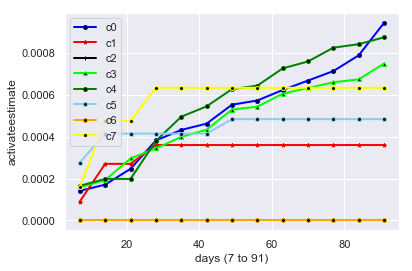

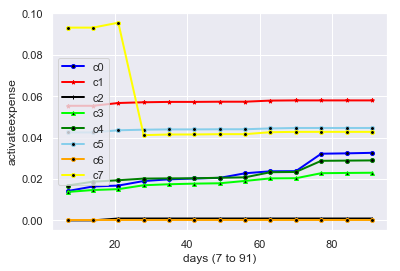

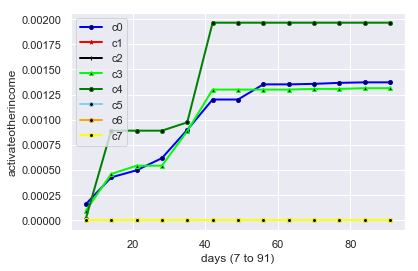

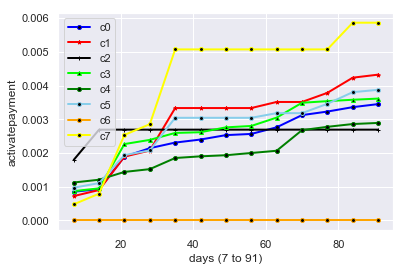

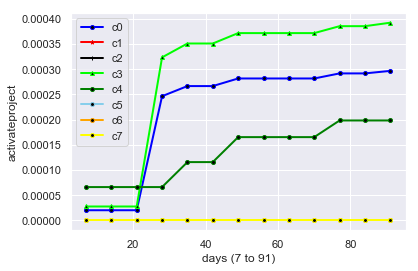

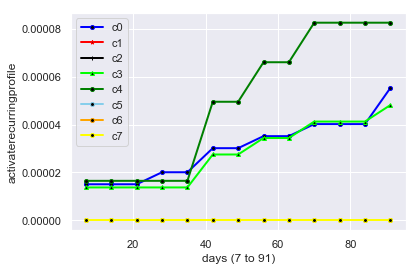

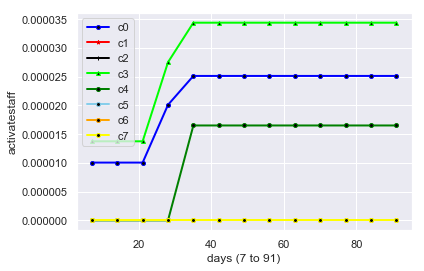

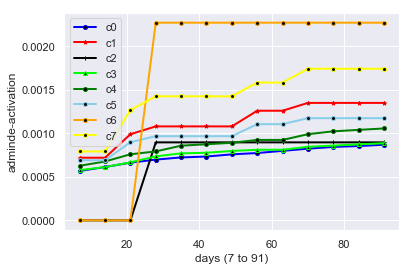

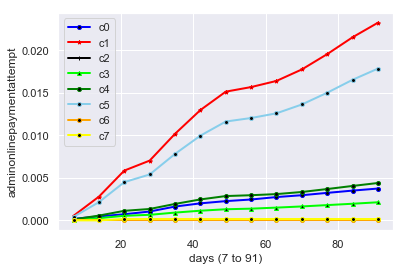

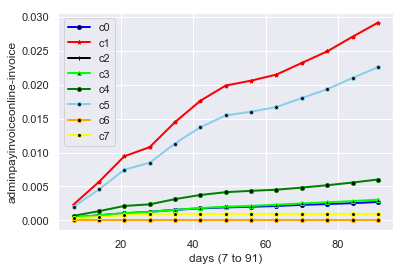

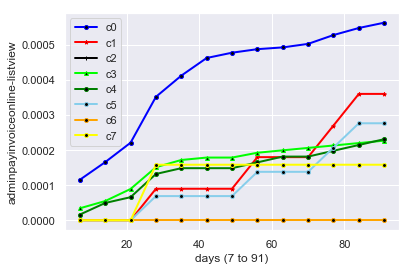

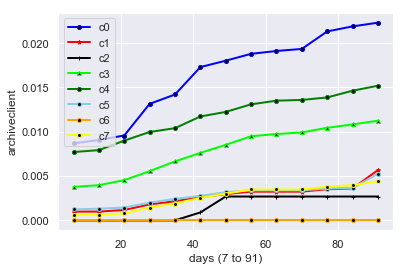

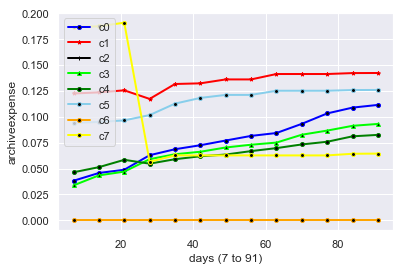

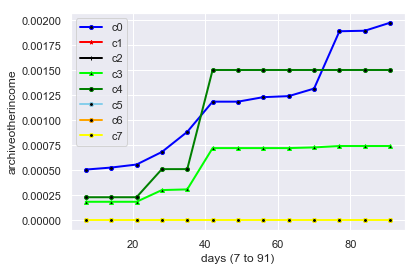

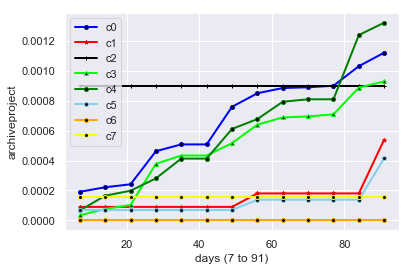

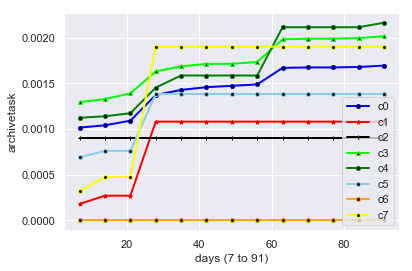

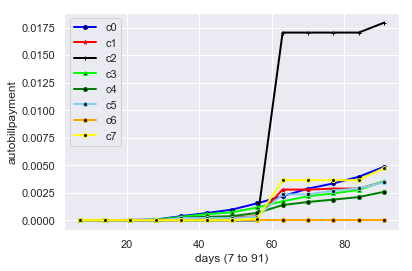

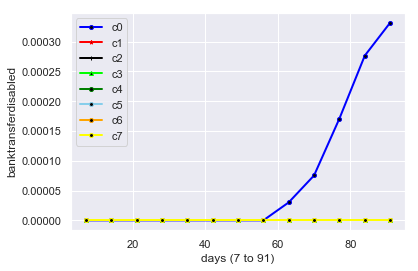

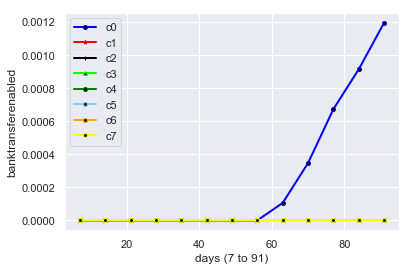

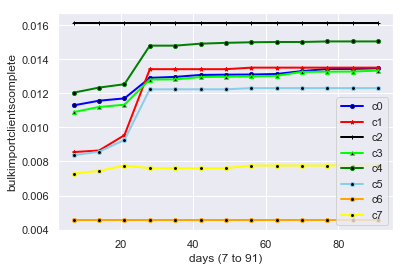

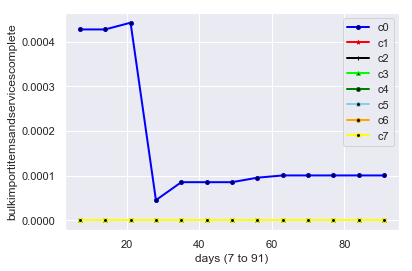

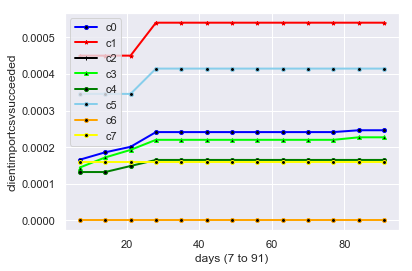

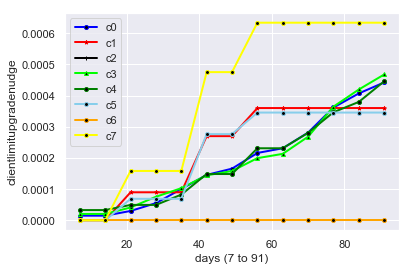

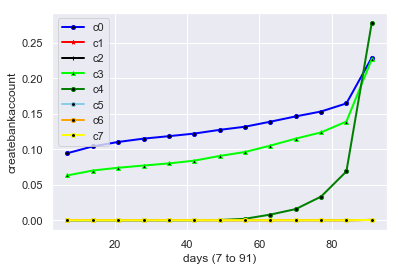

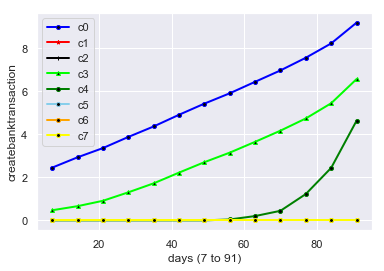

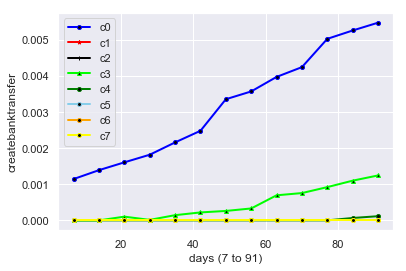

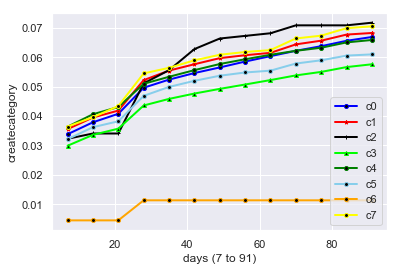

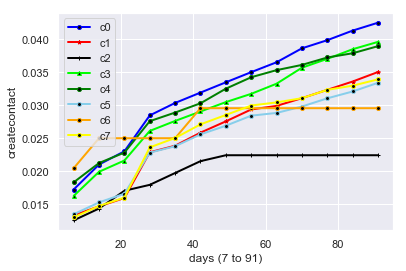

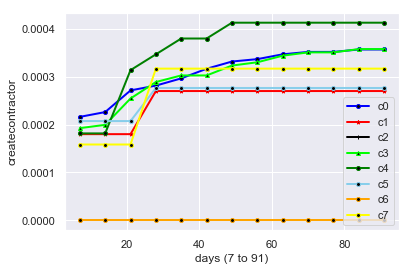

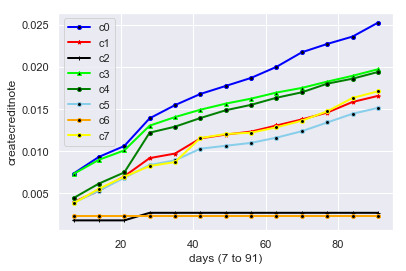

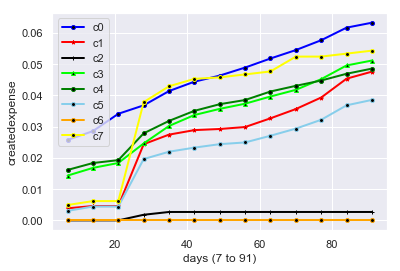

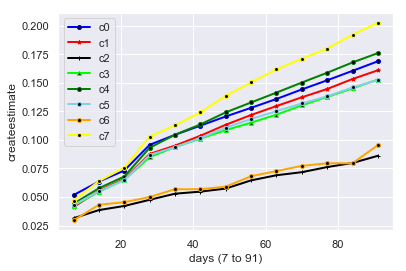

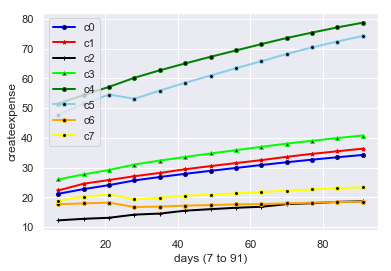

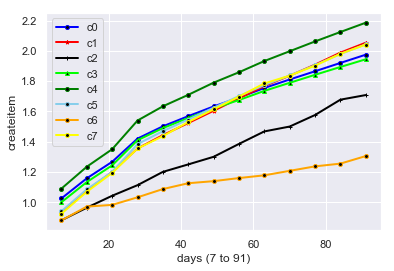

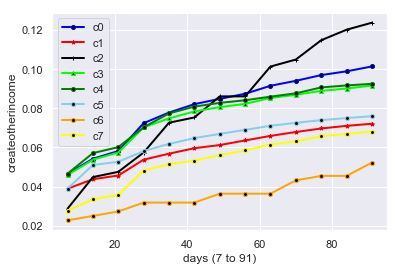

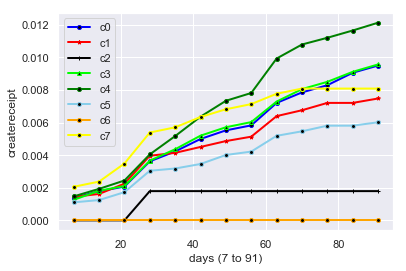

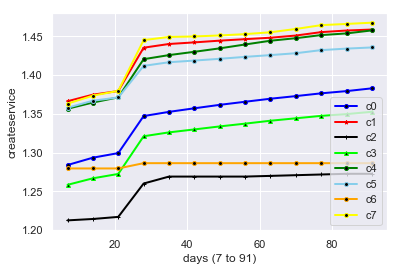

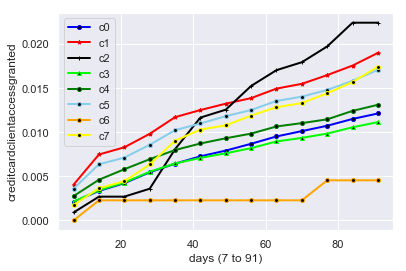

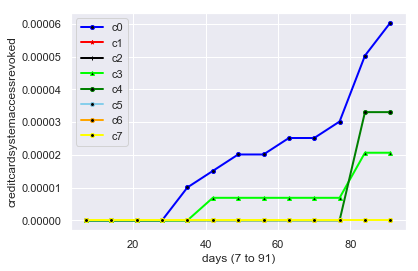

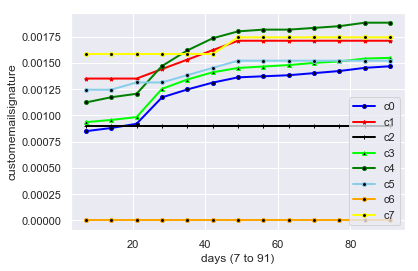

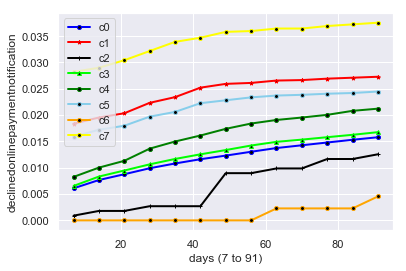

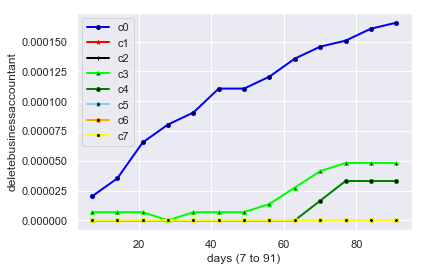

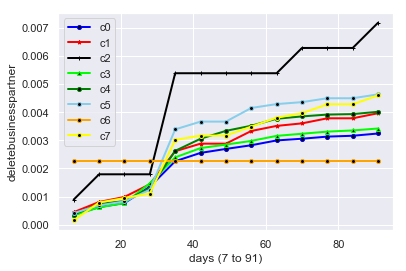

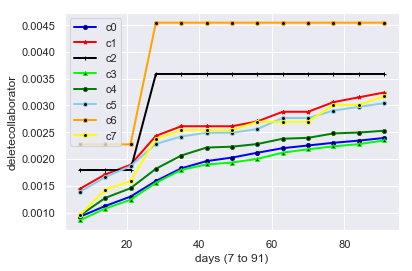

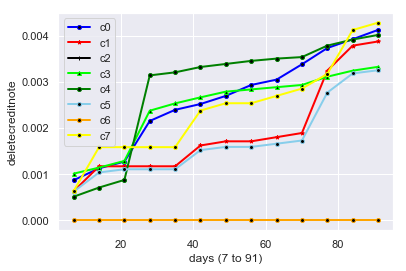

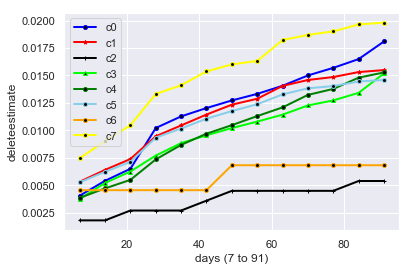

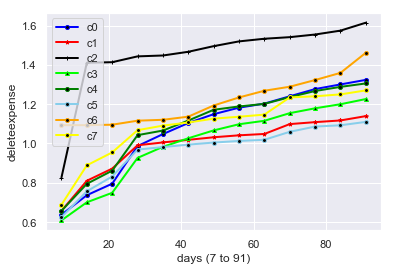

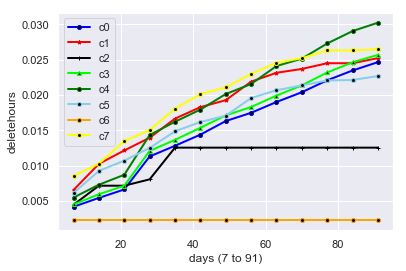

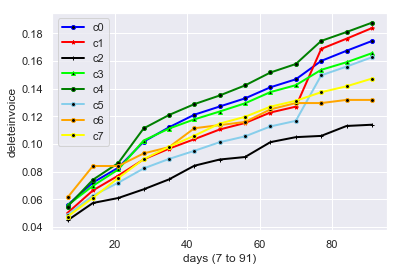

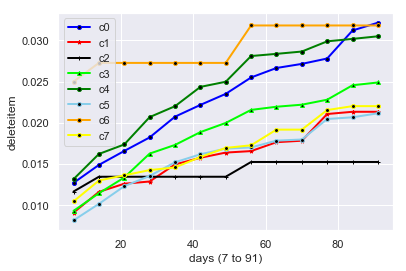

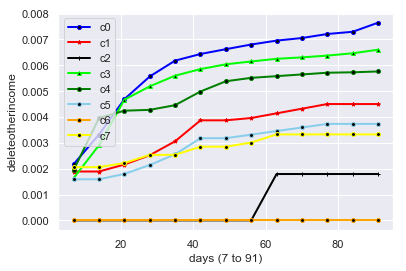

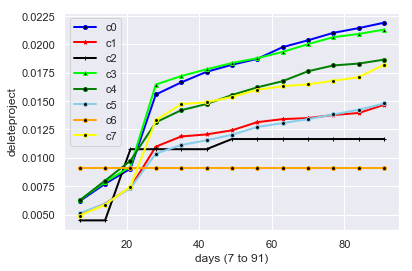

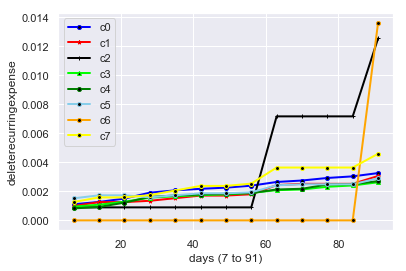

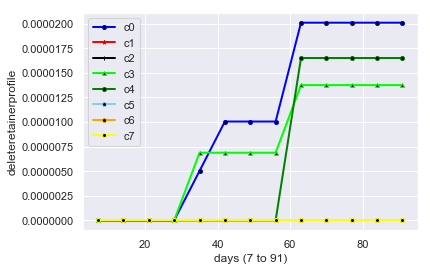

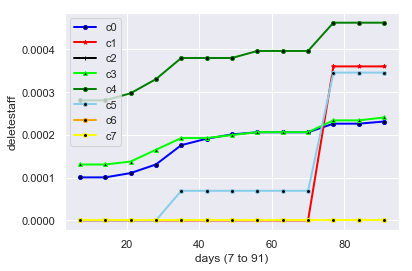

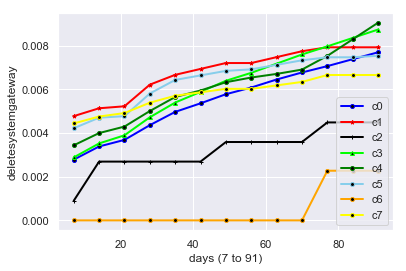

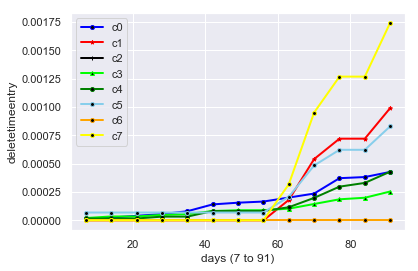

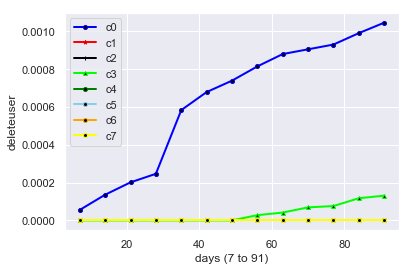

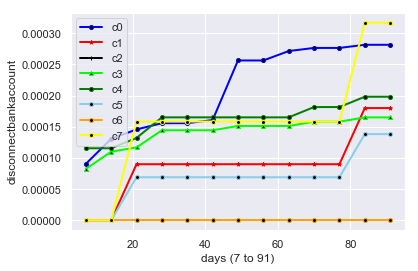

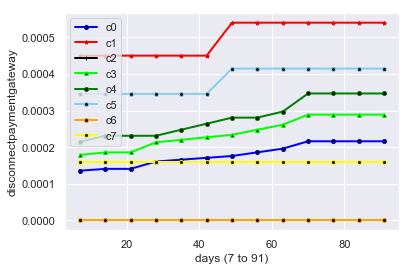

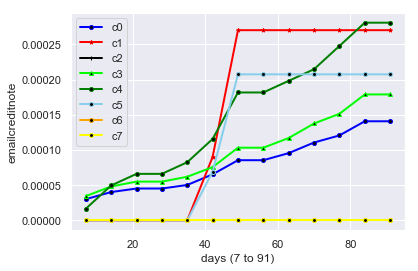

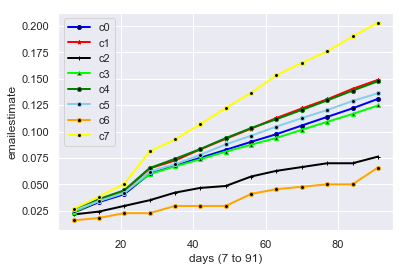

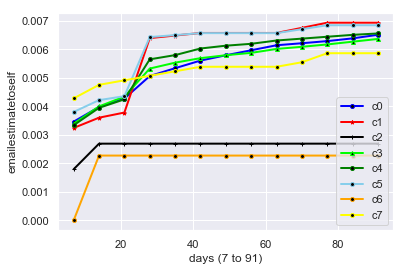

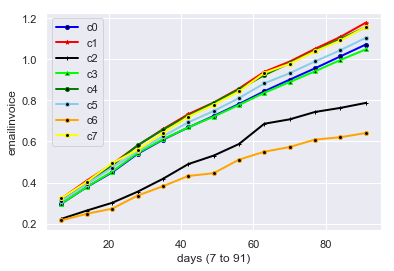

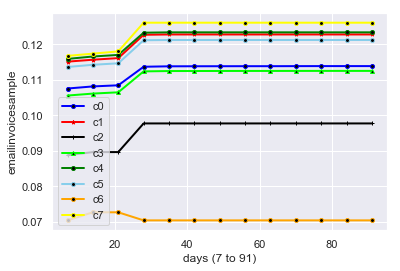

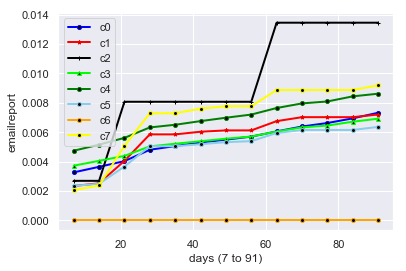

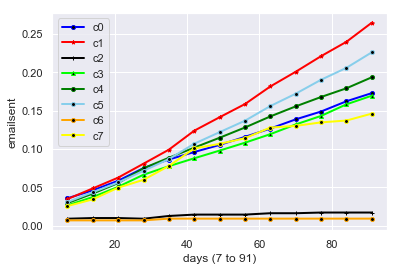

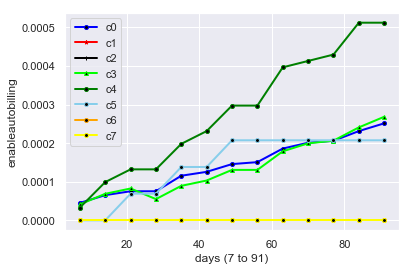

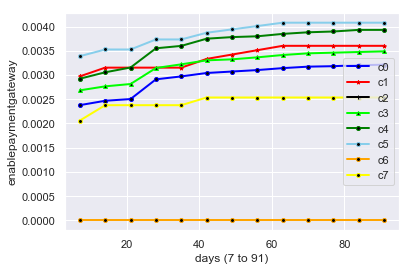

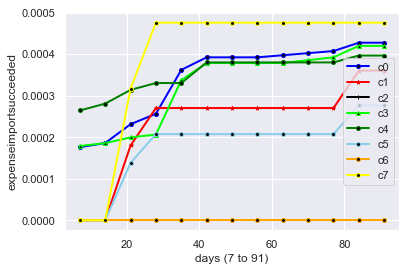

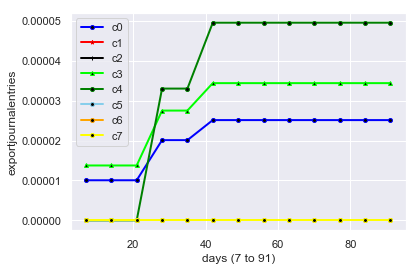

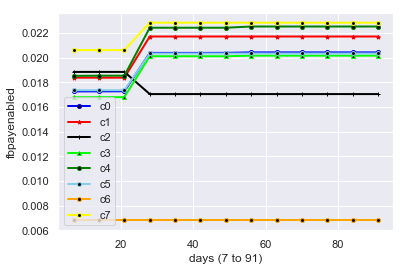

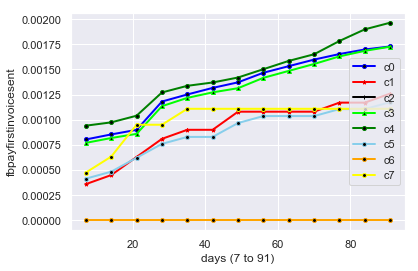

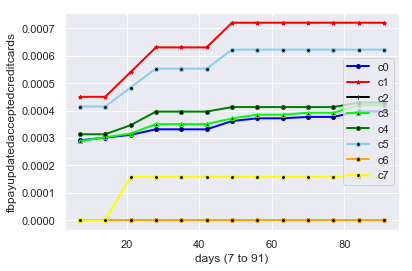

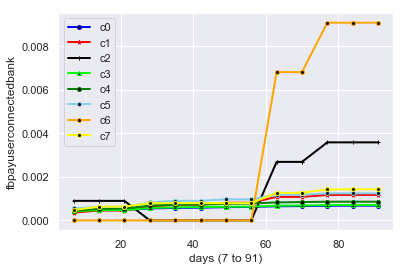

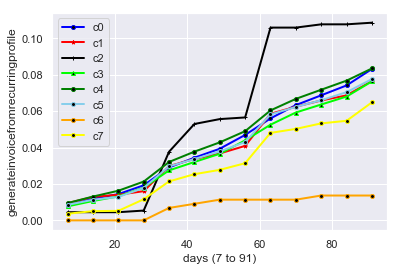

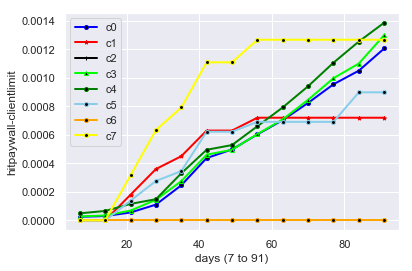

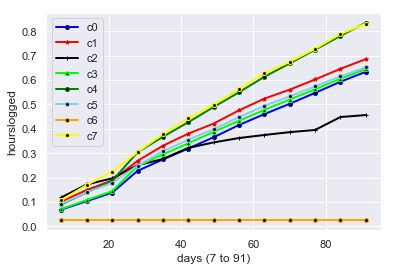

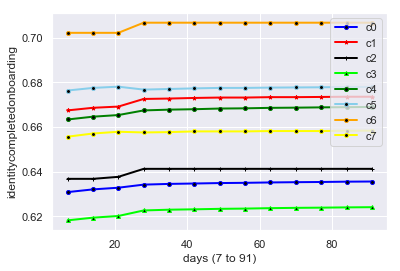

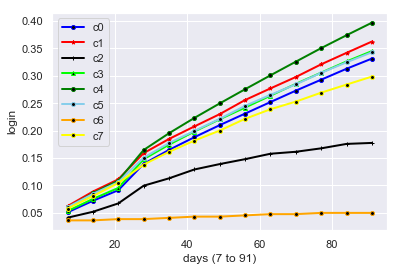

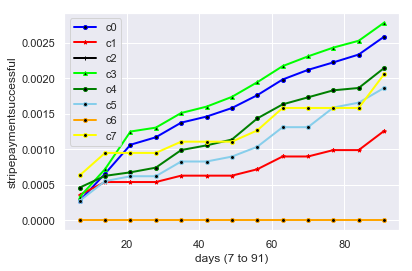

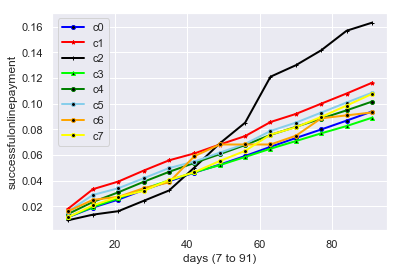

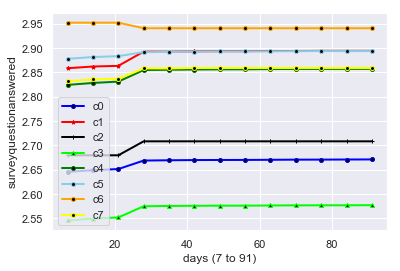

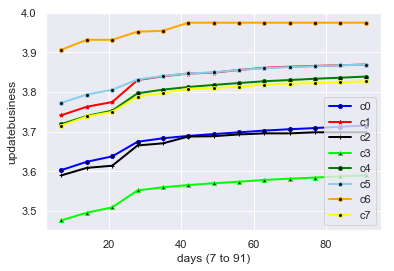

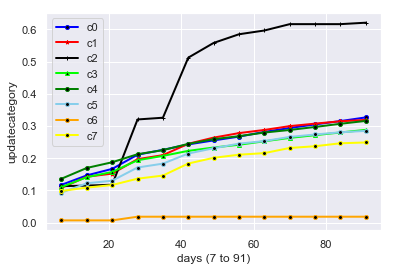

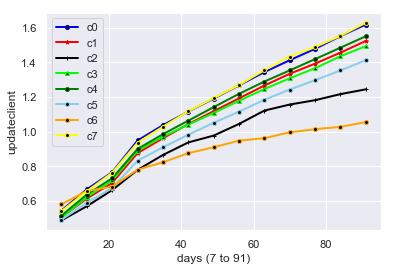

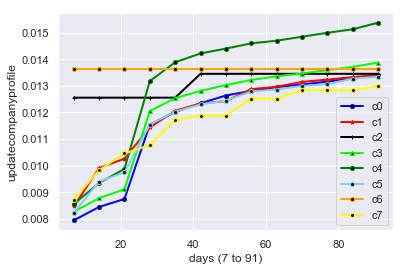

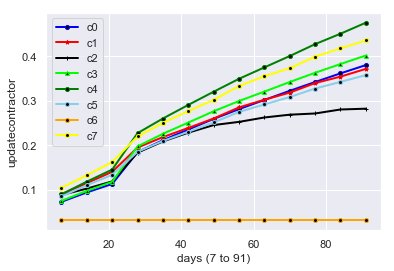

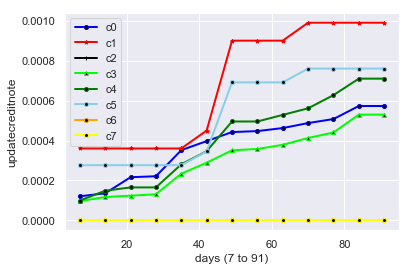

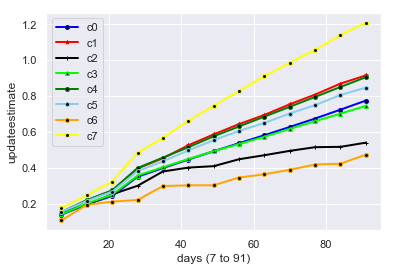

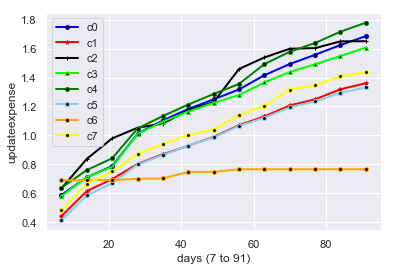

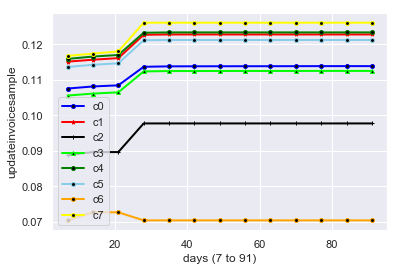

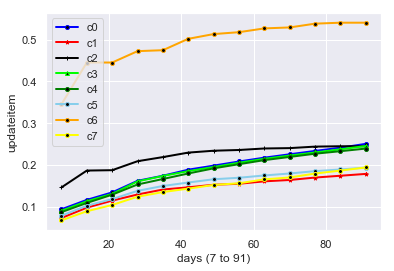

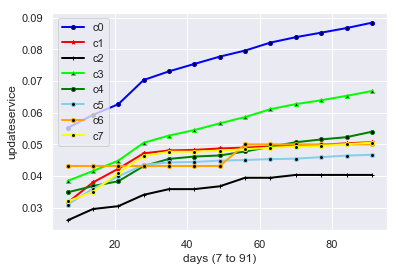

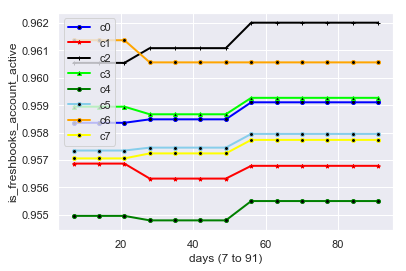

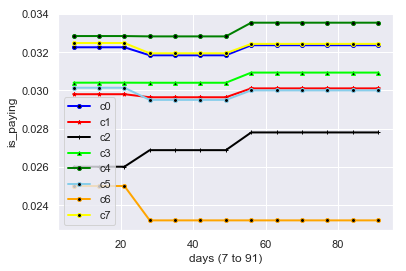

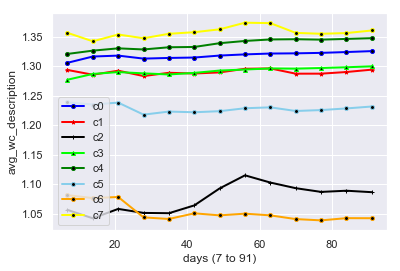

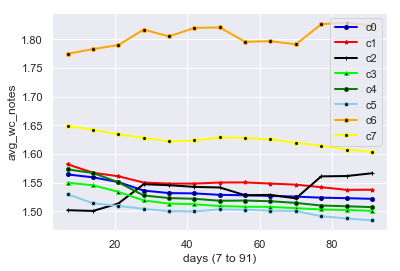

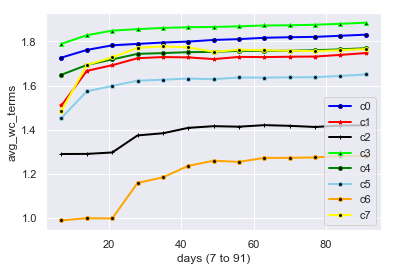

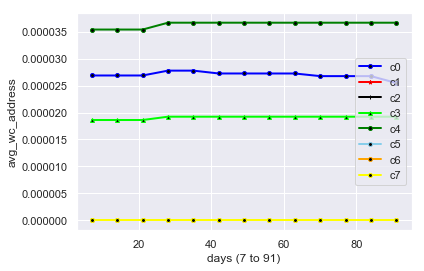

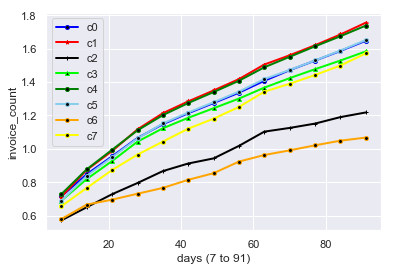

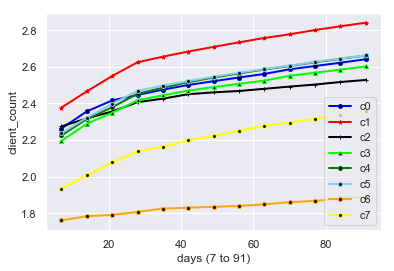

In [21]:

# Identification
cls_method = 'gmm'
cls_period = 'day_7'
cls_size = 'k8'
path = "/Users/dwahid/Documents/GitHub/fraud_detection/figures/"



# Feature name string
# feature_str = 'activateestimate'

for feature_str in feature_names:
    cluster_feature_plot(cls_method, cls_period, cls_size, path, feature_str)
    
